It is a Regression project.

In [1]:
# import the library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('All Library imported')

import warnings
warnings.filterwarnings("ignore")

All Library imported


In [2]:
# 1. Import the dataset

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.shape

(27321, 80)

In [4]:
df_test.shape

(11709, 80)

In [5]:
df_train.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [6]:
df_test.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
1,252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377
2,276314,NaN,140,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,...,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026
3,248614,NaN,140,231,21,Kentucky,KY,Monticello,Monticello City,City,...,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489
4,286865,NaN,140,355,48,Texas,TX,Corpus Christi,Edroy,Town,...,40.66618,42.66667,21.30900,709.90829,2956.0,0.79077,0.57620,0.01726,0.00588,0.16379


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27321 entries, 0 to 27320
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          27321 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     27321 non-null  int64  
 3   COUNTYID                     27321 non-null  int64  
 4   STATEID                      27321 non-null  int64  
 5   state                        27321 non-null  object 
 6   state_ab                     27321 non-null  object 
 7   city                         27321 non-null  object 
 8   place                        27321 non-null  object 
 9   type                         27321 non-null  object 
 10  primary                      27321 non-null  object 
 11  zip_code                     27321 non-null  int64  
 12  area_code                    27321 non-null  int64  
 13  lat             

### 2. Figure out the Primary key and look for requirement of Indexing

In [8]:
# UID is the primary key, so index must be created 

df_train.set_index(keys=['UID'],inplace=True)

df_test.set_index(keys=['UID'],inplace=True)

In [9]:
df_train.head(2)

,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.0877
246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.0903


In [10]:
df_test.head(2)

,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,tract,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,tract,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377


### 3. Gauge the fill rate of the variables and devise plans for missing value treatment. Please explain explicitly the reason for the treatment chosen for each variable.

In [11]:
# percentage of missing values in train set

missing_values=df_train.isnull().sum()/len(df_train)*100

# adding the column to the Dataframe to sort the column later
missing_values_df=pd.DataFrame(missing_values,columns=['Percentage of Missing values'])

In [12]:
missing_values_df.sort_values(by=['Percentage of Missing values'],inplace=True,ascending=False)

missing_values_df

,Percentage of Missing values
BLOCKID,100.000000
hc_samples,2.196113
hc_mean,2.196113
hc_median,2.196113
hc_stdev,2.196113
...,...
state,0.000000
zip_code,0.000000
city,0.000000
place,0.000000


In [13]:
# To view only the top 10 values

missing_values_df[missing_values_df['Percentage of Missing values']>0][:10]

,Percentage of Missing values
BLOCKID,100.000000
hc_samples,2.196113
hc_mean,2.196113
hc_median,2.196113
hc_stdev,2.196113
hc_sample_weight,2.196113
hc_mortgage_mean,2.097288
hc_mortgage_stdev,2.097288
hc_mortgage_sample_weight,2.097288
hc_mortgage_samples,2.097288


In [14]:
# percentage of missing values in test set

missing_values=df_test.isnull().sum()/len(df_test)*100

missing_values_df_test=pd.DataFrame(missing_values,columns=['Percentage of Missing values'])

missing_values_df_test.sort_values(by=['Percentage of Missing values'],inplace=True,ascending=False)

missing_values_df_test[missing_values_df_test['Percentage of Missing values']>0][:10]

,Percentage of Missing values
BLOCKID,100.000000
hc_samples,2.476727
hc_mean,2.476727
hc_median,2.476727
hc_stdev,2.476727
hc_sample_weight,2.476727
hc_mortgage_mean,2.288838
hc_mortgage_stdev,2.288838
hc_mortgage_sample_weight,2.288838
hc_mortgage_samples,2.288838


#### DROP
1. BLOCKID as it is completely empty
1. SUMLEVEL as it does not have any predictive power as it has same value for every user.

In [15]:
# Drop the BlockID & Sum level from train dataset

df_train.drop(columns=['BLOCKID','SUMLEVEL'],inplace=True)

In [16]:
#  Drop the BlockID & Sum level from test dataset

df_test.drop(columns=['BLOCKID','SUMLEVEL'],inplace=True)


In [17]:
df_train.shape

(27321, 77)

In [18]:
df_test.shape

(11709, 77)

In [19]:
# Missing values can be filled with Mean as it is quite difficult to check for each individual column if it has normal distribution or skewed.
# So better to follow a common approach.

missing_values_cols=[]

for col in df_train.columns:

    if df_train[col].isna().sum()!=0:    # searching for missing values

        missing_values_cols.append(col)

print(len(missing_values_cols), ' columns have missing values')

58  columns have missing values


In [20]:
# impute the missing values with the mean

for col in df_train.columns:

    if col in (missing_values_cols):

        df_train[col].replace(np.nan,df_train[col].mean(),inplace=True)

In [21]:
# check if any missing values still left in training data

df_train.isnull().sum().any()

False

In [22]:
#Create col of missing values in test data

missing_values_cols=[]

for col in df_test.columns:

    if df_test[col].isna().sum()!=0:

        missing_values_cols.append(col)

print(len(missing_values_cols), ' columns have missing values')

58  columns have missing values


In [23]:
# impute the missing values with the mean

for col in df_test.columns:

    if col in (missing_values_cols):

        df_test[col].replace(np.nan,df_test[col].mean(),inplace=True)

In [24]:
# missing values 

df_test.isnull().sum().any()

False

### Exploratory Data Analysis (EDA):

4. Perform debt analysis. You may take the following steps:

    a. Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map (using tableau). You may keep the upper limit for the percent of households with a second mortgage to 50 percent

    b. Use the following bad debt equation:

        Bad Debt = P (Second Mortgage ∩ Home Equity Loan)
        Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage
        Create pie charts  to show overall debt and bad debt

    c. Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt, and bad debt for different cities

    d. Create a collated income distribution chart for family income, house hold income, and remaining income

## 4a

In [25]:
!pip install pandasql

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [26]:
from pandasql import sqldf

# its not compulsory to use SQL here , you can use pandas as well.

q1='select place,pct_own,second_mortgage,lat,lng from df_train where pct_own>0.10 and second_mortgage<0.5 order by second_mortgage DESC LIMIT 2500;'

query_df=lambda q:sqldf(q,globals())

df_train_location_mort_pct=query_df(q1)

In [27]:

df_train_location_mort_pct.head(2)

,place,pct_own,second_mortgage,lat,lng
0,Worcester City,0.20247,0.43363,42.254262,-71.800347
1,Harbor Hills,0.15618,0.31818,40.751809,-73.853582


## 4b

In [28]:
df_train['bad_debt']=df_train['second_mortgage']+df_train['home_equity']-df_train['home_equity_second_mortgage']
df_train['bad_debt']

UID
267822    0.09408
246444    0.04274
245683    0.09512
279653    0.01086
247218    0.05426
           ...   
279212    0.00000
277856    0.20908
233000    0.07857
287425    0.14305
265371    0.18362
Name: bad_debt, Length: 27321, dtype: float64

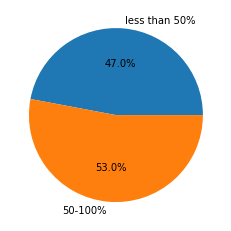

In [29]:
# Create pie charts  to show overall debt and bad debt

df_train['bins'] = pd.cut(df_train['bad_debt'],bins=[0,0.10,1],labels=["less than 50%",'50-100%'])

df_train.groupby(['bins']).size().plot(kind='pie',subplots=True,autopct='%1.1f%%')

plt.show()

## 4c

In [30]:
# Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt, and bad debt for different cities

# take 2 cities randomly

cols=['second_mortgage','home_equity','debt','bad_debt']

df_Hamilton = df_train.loc[df_train['city'] =='Hamilton']

df_Manhattan = df_train.loc[df_train['city'] =='Manhattan']

df_city = pd.concat([df_Hamilton,df_Manhattan])

In [31]:
df_city.shape

(24, 79)

<AxesSubplot: xlabel='second_mortgage', ylabel='city'>

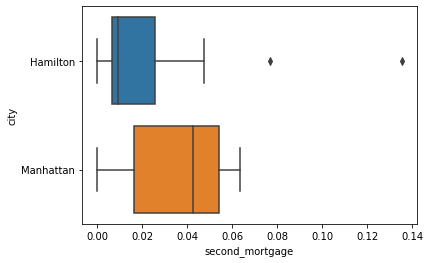

In [32]:
sns.boxplot(data=df_city, x='second_mortgage', y='city')

Manhattan has more 2nd mortgage

<AxesSubplot: xlabel='home_equity', ylabel='city'>

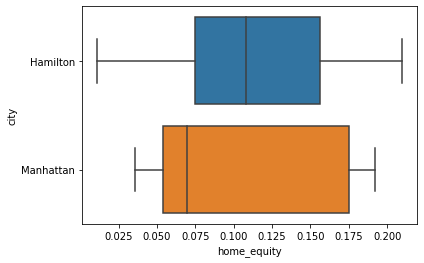

In [33]:
sns.boxplot(data=df_city,x='home_equity',y='city')

Manhattan has more home equity
range for hamilton is high, IQR for manhattan is high ; 
median is very left side -> skewed distribution for Manhattan

<AxesSubplot: xlabel='debt', ylabel='city'>

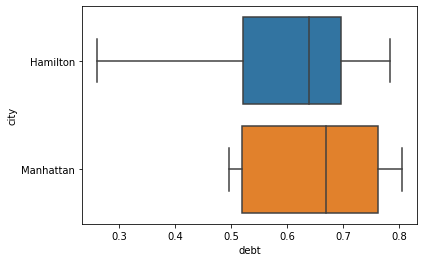

In [34]:
sns.boxplot(data=df_city,x='debt',y='city')

<AxesSubplot: xlabel='bad_debt', ylabel='city'>

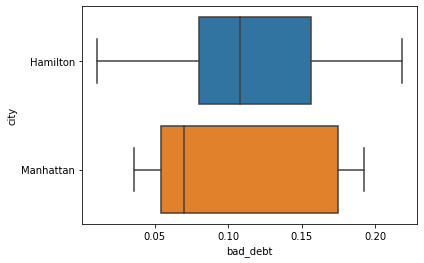

In [35]:
sns.boxplot(data=df_city,x='bad_debt',y='city')

### After comparing all these graphs we see that Manhattan has higher matrics compared to Hamilton

## 4 d

In [36]:
#  Create a collated income distribution chart for family income, house hold income, and remaining income

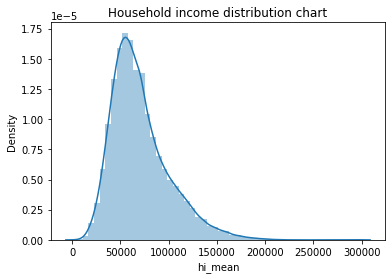

In [37]:
sns.distplot(df_train['hi_mean'])

plt.title('Household income distribution chart')

plt.show()

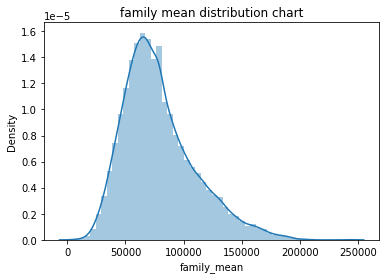

In [38]:
sns.distplot(df_train['family_mean'])

plt.title('family mean distribution chart')

plt.show()

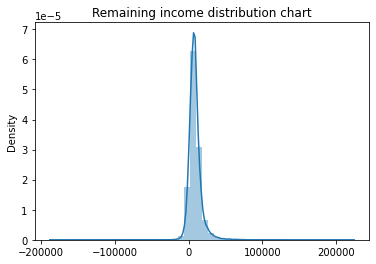

In [39]:
# Remaining income = family mean - household income mean

sns.distplot(df_train['family_mean']-df_train['hi_mean'])

plt.title('Remaining income distribution chart')

plt.show()

Normally distributed

## 5. Perform EDA and come out with insights into population density and age. You may have to derive new fields (make sure to weight averages for accurate measurements): 

    Use pop and ALand variables to create a new field called population density

    Use male_age_median, female_age_median, male_pop, and female_pop to create a new field called median age

    Visualize the findings using appropriate chart type

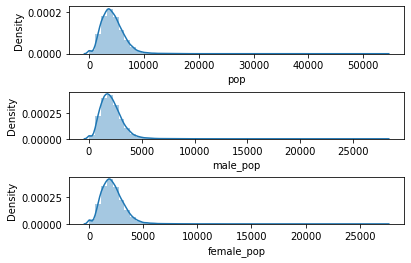

In [40]:
# Population Charts

fig,(ax1,ax2,ax3)=plt.subplots(3,1)
sns.distplot(df_train['pop'],ax=ax1)
sns.distplot(df_train['male_pop'],ax=ax2)
sns.distplot(df_train['female_pop'],ax=ax3)
plt.subplots_adjust(wspace=0.8,hspace=0.8)
plt.show()

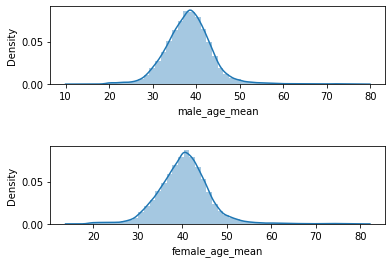

In [41]:
# Doing the above chart for Age now

fig,(ax1,ax2)=plt.subplots(2,1)

sns.distplot(df_train['male_age_mean'],ax=ax1)

sns.distplot(df_train['female_age_mean'],ax=ax2)

plt.subplots_adjust(wspace=0.8,hspace=0.8)

plt.show()

In [42]:
# calculate population density
# ALand - The square area of land at the geographic or track location. what is the area occupied at that geographic location.

df_train['pop_density'] = df_train['pop']/df_train['ALand']

In [43]:
df_test['pop_density'] = df_test['pop']/df_test['ALand']

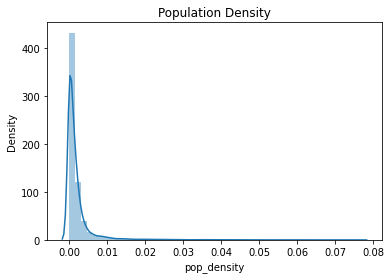

In [44]:
# Analyse density is high or low?

sns.distplot(df_train['pop_density'])
plt.title('Population Density')
plt.show()

Population density is very less.

In [45]:
# Use male_age_median, female_age_median, male_pop, and female_pop to create a new field called median age

df_train['age_median'] = (df_train['male_age_median'] + df_train['female_age_median'])/2

df_test['age_median'] = (df_test['male_age_median'] + df_test['female_age_median'])/2


In [46]:
df_train[['male_age_median','female_age_median','male_pop','female_pop','age_median']].head()

,male_age_median,female_age_median,male_pop,female_pop,age_median
UID,,,,,
267822,44.00000,45.33333,2612,2618,44.666665
246444,32.00000,37.58333,1349,1284,34.791665
245683,40.83333,42.83333,3643,3238,41.833330
279653,48.91667,50.58333,1141,1559,49.750000
247218,22.41667,21.58333,2586,3051,22.000000


### UID is like pincode here. It is the ID of the location.
location where age median is high expenses would be more.

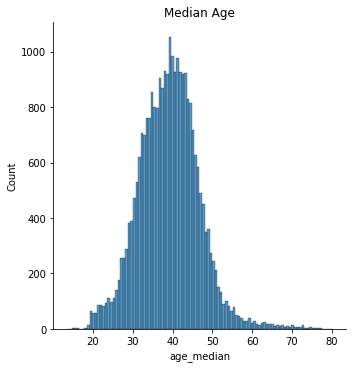

In [47]:
# Plotting chart for age median

sns.displot(df_train['age_median'])
plt.title('Median Age')
plt.show()

# Age of population is mostly between 20 and 60
# Majority are of age around 40
# Median age distribution has a gaussian distribution
# Some right skewness is noticed

## 6. Create bins for population into a new variable by selecting appropriate class interval so that the number of categories don’t exceed 5 for the ease of analysis.

In [48]:
df_train['pop'].describe()

count    27321.000000
mean      4316.032685
std       2169.226173
min          0.000000
25%       2885.000000
50%       4042.000000
75%       5430.000000
max      53812.000000
Name: pop, dtype: float64

In [49]:
df_train['pop_bins']=pd.cut(df_train['pop'],bins=5,labels=['very low','low','medium','high','very high'])

In [50]:
df_train[['pop','pop_bins']]

,pop,pop_bins
UID,,
267822,5230,very low
246444,2633,very low
245683,6881,very low
279653,2700,very low
247218,5637,very low
...,...,...
279212,1847,very low
277856,4155,very low
233000,2829,very low


In [51]:
df_train['pop_bins'].value_counts()

very low     27058
low            246
medium           9
high             7
very high        1
Name: pop_bins, dtype: int64

### Analyze the married, separated, and divorced population for these population brackets. 

In [52]:
df_train.groupby(by='pop_bins')[['married','separated','divorced']].count()

# but it's showing same numbers for each column so we nned to work with some aggregate function.

,married,separated,divorced
pop_bins,,,
very low,27058,27058,27058
low,246,246,246
medium,9,9,9
high,7,7,7
very high,1,1,1


In [53]:
df_train.groupby(by='pop_bins')[['married','separated','divorced']].agg(["mean", "median"])

married           separated            divorced          
               mean    median      mean    median      mean    median
pop_bins                                                             
very low   0.507548  0.524680  0.019126  0.013650  0.100504  0.096020
low        0.584894  0.593135  0.015833  0.011195  0.075348  0.070045
medium     0.655737  0.618710  0.005003  0.004120  0.065927  0.064890
high       0.503359  0.335660  0.008141  0.002500  0.039030  0.010320
very high  0.734740  0.734740  0.004050  0.004050  0.030360  0.030360

Very high population group has more married people and less percantage of separated and divorced couples. 

In very low population groups, there are more married people

For all categories of divorced column, we can see that it is high for very low category. and it is very less in very high population bin.

### Visualize using appropriate chart type

<Figure size 720x360 with 0 Axes>

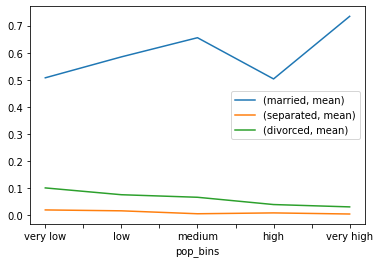

In [54]:
# Creating a line chart

plt.figure(figsize=(10,5))

pop_bin=df_train.groupby(by='pop_bins')[['married','separated','divorced']].agg(["mean"])

pop_bin.plot()

plt.legend(loc='best')

plt.show()

## 7. Please detail your observations for rent as a percentage of income at an overall level, and for different states.

In [55]:
# State-wise rent mean

rent_state_mean=df_train.groupby(by='state')['rent_mean'].agg(["mean"])
rent_state_mean.head()

,mean
state,
Alabama,774.004927
Alaska,1185.763570
Arizona,1097.753511
Arkansas,720.918575
California,1471.133857


In [56]:
# State-wise income mean

income_state_mean=df_train.groupby(by='state')['family_mean'].agg(["mean"])
income_state_mean.head()

,mean
state,
Alabama,67030.064213
Alaska,92136.545109
Arizona,73328.238798
Arkansas,64765.377850
California,87655.470820


In [57]:
# rent as a percentage of income for different states

rent_perc_of_income=(rent_state_mean['mean']/income_state_mean['mean'])*100
rent_perc_of_income.head(5)

state
Alabama       1.154713
Alaska        1.286963
Arizona       1.497041
Arkansas      1.113123
California    1.678314
Name: mean, dtype: float64

In [58]:
# rent as a percentage of income at an overall level

(sum(df_train['rent_mean'])/sum(df_train['family_mean']))*100

1.3358170721473863

### Overall Rent as a percentage of Overall House Hold Income is around 1.33%

## 8. Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings.

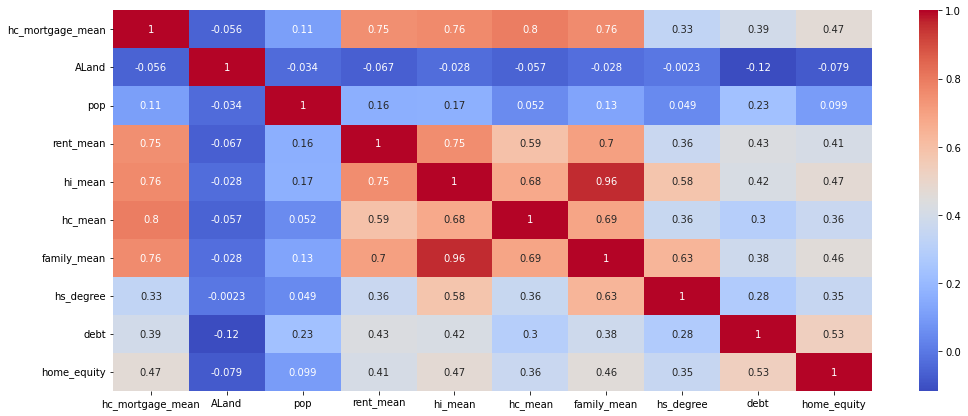

In [59]:
plt.figure(figsize=(17,7))
sns.heatmap(data=df_train[['hc_mortgage_mean','ALand','pop','rent_mean','hi_mean','hc_mean','family_mean',
                           'hs_degree','debt','home_equity']].corr(),annot=True, cmap='coolwarm')
plt.show()

Household Income mean and family income mean are highly positively correlated.
"Family Income" and "hc_mortgage" are positively correlated.
